In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [30]:
def custom_threshold(img, threshold=128):
    binary_img = np.where(img >= threshold, 1, 0)
    return binary_img

In [31]:
def custom_erode(img, struct_elem):
    r1 = struct_elem.shape[0] // 2
    r2 = struct_elem.shape[1] // 2

    eroded_img = np.zeros_like(img)

    for i in range(r1, img.shape[0] - r1):
        for j in range(r2, img.shape[1] - r2):
            region = img[i - r1:i + r1 + 1, j - r2:j + r2 + 1]
            if np.all(region[struct_elem == 1] == 1):
                eroded_img[i, j] = 1
    return eroded_img

def dilation(img, struct_elem):
    r1 = struct_elem.shape[0] // 2
    r2 = struct_elem.shape[1] // 2

    dilated_img = np.zeros_like(img)

    for i in range(r1, img.shape[0] - r1):
        for j in range(r2, img.shape[1] - r2):
            region = img[i - r1:i + r1 + 1, j - r2:j + r2 + 1]
            if np.any(region[struct_elem == 1] == 1):
                dilated_img[i, j] = 1
    return dilated_img

def custom_opening(img, struct_elem):
    eroded = custom_erode(img, struct_elem)
    struct_elem = np.rot90(struct_elem,2)
    opened = dilation(eroded, struct_elem)
    return opened


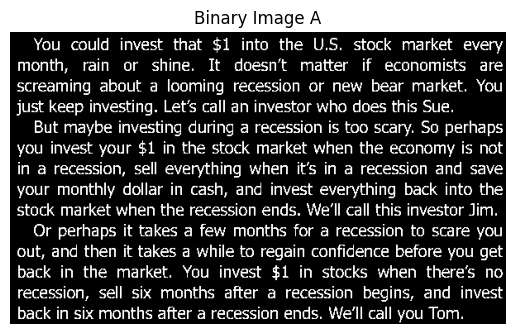

In [32]:
img = cv2.imread("data/image1.png", cv2.IMREAD_GRAYSCALE)
binary_img = custom_threshold(img)
binary_img = 1-binary_img
cv2.imwrite("data/binary_img.png", binary_img * 255)  # Scale up for correct image saving
plt.imshow(binary_img, cmap="gray")
plt.title("Binary Image A")
plt.axis("off")
plt.savefig("data/binary_image.png")
plt.show()

In [33]:
def create_disk_structure(radius):
    size = 2 * radius + 1
    disk = np.zeros((size, size), dtype=int)
    for i in range(size):
        for j in range(size):
            if (i - radius) ** 2 + (j - radius) ** 2 <= radius ** 2:
                disk[i, j] = 1
    return disk
disk1 =create_disk_structure(1)

In [34]:
dilated_image = dilation(binary_img, disk1)

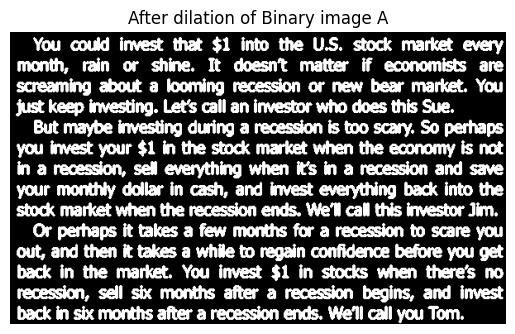

In [35]:
plt.imshow(dilated_image, cmap="gray")
plt.title("After dilation of Binary image A")
plt.axis('off')
plt.show()

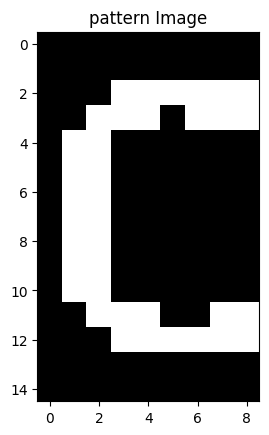

In [36]:
img = cv2.imread("data/c_source.png", cv2.IMREAD_GRAYSCALE)
img=custom_threshold(img)
plt.imshow(img, cmap="gray")
plt.title("pattern Image")
plt.show()

In [37]:
z= np.array([[0,0,0],[0,1,1],[0,0,0]])
z

array([[0, 0, 0],
       [0, 1, 1],
       [0, 0, 0]])

In [38]:
img

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [39]:
opened_image2 = custom_opening(binary_img,img)
cv2.imwrite("Output_images/Q1/b.png",opened_image2*255)

True

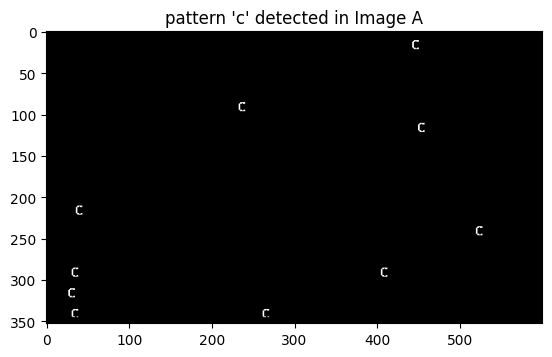

In [40]:
plt.imshow(opened_image2, cmap="gray", origin="upper")
plt.title("pattern 'c' detected in Image A")
plt.show()

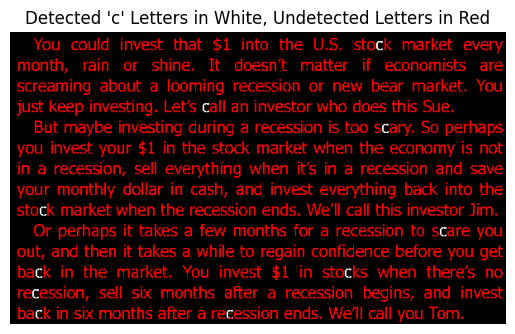

In [41]:
rgb_image = np.zeros((binary_img.shape[0], binary_img.shape[1], 3), dtype=np.uint8)

rgb_image[:, :, 0] = binary_img * 255  # Red component

rgb_image[:, :, 1] = opened_image2 * 255  # Green component
rgb_image[:, :, 2] = opened_image2 * 255  # Blue component

# Step 4: Display the result

plt.imshow(rgb_image)
plt.title("Detected 'c' Letters in White, Undetected Letters in Red")
plt.axis('off')
plt.savefig("Output_images/Q1/Q1_b_rgb_image.png")
plt.show()

In [42]:
#*****************Part C*******************

def custom_dilate_se(struct_elem, iterations=2):
    """Dilates the structuring element to create B1."""
    struct_elem_dilated = np.copy(struct_elem)
    
    for _ in range(iterations):
        struct_elem_erosion = custom_erode(struct_elem, z)    
    return struct_elem_erosion


B = img.copy()
B1 = custom_dilate_se(B, iterations=1)


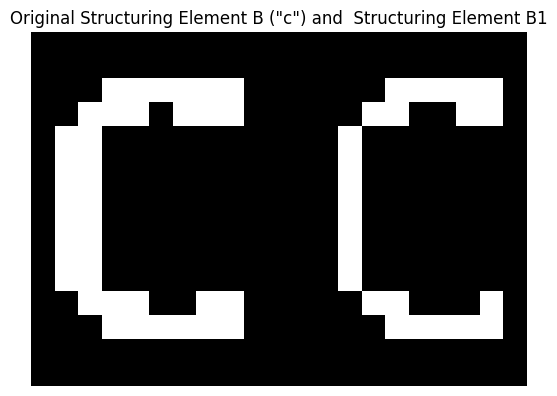

In [43]:

def add_border_between_images(img1, img2, border_width=5, border_color=0):
    border = np.full((img1.shape[0], border_width), border_color, dtype=img1.dtype)
    combined_img = np.hstack((img1, border, img2))
    return combined_img


combined_img_with_border = add_border_between_images(B, B1, border_width=3, border_color=0)
plt.imshow(combined_img_with_border, cmap="gray")
plt.title("Original Structuring Element B (\"c\") and  Structuring Element B1")
plt.axis("off")
plt.show()


In [44]:
def newopening(img,B0,B02):
    eroded = custom_erode(img, B02)
    B02 = np.rot90(B02,2)
    opened = dilation(eroded, B02)
    return opened

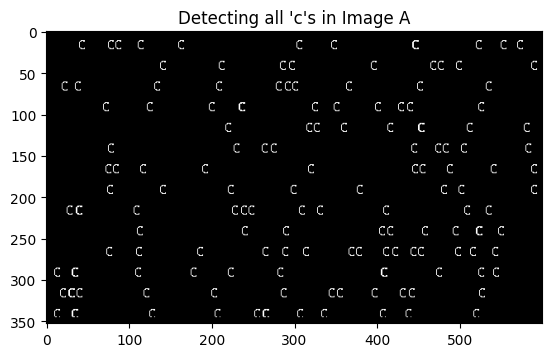

In [45]:
opened_image3= newopening(binary_img,B,B1)
cv2.imwrite("Output_images/Q1/Q1_c_patterns.png",opened_image3*255)
plt.imshow(opened_image3, cmap="gray", origin="upper")
plt.title("Detecting all 'c's in Image A")
plt.show()

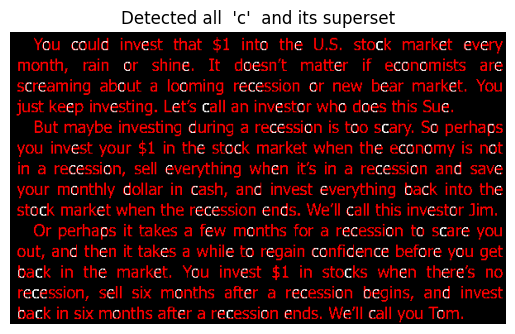

In [46]:
rgb_image = np.zeros((binary_img.shape[0], binary_img.shape[1], 3), dtype=np.uint8)

rgb_image[:, :, 0] = binary_img * 255  # Red component

rgb_image[:, :, 1] = opened_image3 * 255  # Green component
rgb_image[:, :, 2] = opened_image3 * 255  # Blue component

plt.imshow(rgb_image)
plt.title("Detected all  'c'  and its superset")
plt.axis('off')
plt.savefig("Output_images/Q1/Q1_b_rgb_image.png")
plt.show()